#Data Preparation

## Import Data

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

from google.colab import drive
drive.mount('/content/drive')

path1 = "/content/drive/MyDrive/DS/aggregate_median_jams_Kota Bandung_fixed.csv"

df = pd.read_csv(path1)
df.head()

matplotlib: 3.5.3
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,0,2022-07-06 00:00:00.000,32.73,KOTA BANDUNG,Jenderal Ahmad Yani,4,428.0,201.5,6.29,14,33471439,2022-07-06,4.0,"MULTILINESTRING ((107.622869 -6.919558, 107.62..."
1,1,2022-07-06 00:00:00.000,32.73,KOTA BANDUNG,Cibaduyut Raya,5,24.0,-1.0,0.00,60,33471432,2022-07-06,5.0,"MULTILINESTRING ((107.59526 -6.947213, 107.595..."
2,2,2022-07-06 00:00:00.000,32.73,KOTA BANDUNG,Cidurian Selatan,2,531.0,101.5,9.07,2,33471433,2022-07-06,2.0,"LINESTRING (107.652971 -6.940132, 107.653181 -..."
3,3,2022-07-06 00:00:00.000,32.73,KOTA BANDUNG,Dr Setiabudi,1,919.0,61.0,20.42,2,33471434,2022-07-06,1.0,"LINESTRING (107.593922 -6.866493, 107.5939 -6...."
4,4,2022-07-06 00:00:00.000,32.73,KOTA BANDUNG,Gerbang Tol Gede Bage,5,318.5,-1.0,0.00,120,33471435,2022-07-06,5.0,"MULTILINESTRING ((107.690448 -6.961397, 107.69..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301995 entries, 0 to 301994
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 301995 non-null  int64  
 1   time                       301995 non-null  object 
 2   kemendagri_kabupaten_kode  301995 non-null  float64
 3   kemendagri_kabupaten_nama  301995 non-null  object 
 4   street                     299552 non-null  object 
 5   level                      301995 non-null  int64  
 6   median_length              301995 non-null  float64
 7   median_delay               301995 non-null  float64
 8   median_speed_kmh           301995 non-null  float64
 9   total_records              301995 non-null  int64  
 10  id                         301995 non-null  int64  
 11  date                       301995 non-null  object 
 12  median_level               301995 non-null  float64
 13  geometry                   30

##Feature Engineering & Data Cleansing

In [ ]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')

df['day'] = df['time'].dt.day_name()

df['hours'] = df['time'].dt.hour

df.head()

,Unnamed: 0,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,day,hours
0,0,2022-07-06,32.73,KOTA BANDUNG,Jenderal Ahmad Yani,4,428.0,201.5,6.29,14,33471439,2022-07-06,4.0,"MULTILINESTRING ((107.622869 -6.919558, 107.62...",Wednesday,0
1,1,2022-07-06,32.73,KOTA BANDUNG,Cibaduyut Raya,5,24.0,-1.0,0.00,60,33471432,2022-07-06,5.0,"MULTILINESTRING ((107.59526 -6.947213, 107.595...",Wednesday,0
2,2,2022-07-06,32.73,KOTA BANDUNG,Cidurian Selatan,2,531.0,101.5,9.07,2,33471433,2022-07-06,2.0,"LINESTRING (107.652971 -6.940132, 107.653181 -...",Wednesday,0
3,3,2022-07-06,32.73,KOTA BANDUNG,Dr Setiabudi,1,919.0,61.0,20.42,2,33471434,2022-07-06,1.0,"LINESTRING (107.593922 -6.866493, 107.5939 -6....",Wednesday,0
4,4,2022-07-06,32.73,KOTA BANDUNG,Gerbang Tol Gede Bage,5,318.5,-1.0,0.00,120,33471435,2022-07-06,5.0,"MULTILINESTRING ((107.690448 -6.961397, 107.69...",Wednesday,0


In [ ]:
df.isnull().sum()

Unnamed: 0                      0
time                            0
kemendagri_kabupaten_kode       0
kemendagri_kabupaten_nama       0
street                       2443
level                           0
median_length                   0
median_delay                    0
median_speed_kmh                0
total_records                   0
id                              0
date                            0
median_level                    0
geometry                        0
day                             0
hours                           0
dtype: int64

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
street,2443,0.00809
Unnamed: 0,0,0.00000
time,0,0.00000
kemendagri_kabupaten_kode,0,0.00000
kemendagri_kabupaten_nama,0,0.00000
level,0,0.00000
median_length,0,0.00000
median_delay,0,0.00000
median_speed_kmh,0,0.00000
total_records,0,0.00000


In [ ]:
df[df.duplicated()]

,Unnamed: 0,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,day,hours


In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299552 entries, 0 to 301994
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Unnamed: 0                 299552 non-null  int64         
 1   time                       299552 non-null  datetime64[ns]
 2   kemendagri_kabupaten_kode  299552 non-null  float64       
 3   kemendagri_kabupaten_nama  299552 non-null  object        
 4   street                     299552 non-null  object        
 5   level                      299552 non-null  int64         
 6   median_length              299552 non-null  float64       
 7   median_delay               299552 non-null  float64       
 8   median_speed_kmh           299552 non-null  float64       
 9   total_records              299552 non-null  int64         
 10  id                         299552 non-null  int64         
 11  date                       299552 non-null  object  

In [ ]:
df = df.drop(['Unnamed: 0','kemendagri_kabupaten_kode','kemendagri_kabupaten_nama', 'id', 'date',
            'geometry'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299552 entries, 0 to 301994
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   time              299552 non-null  datetime64[ns]
 1   street            299552 non-null  object        
 2   level             299552 non-null  int64         
 3   median_length     299552 non-null  float64       
 4   median_delay      299552 non-null  float64       
 5   median_speed_kmh  299552 non-null  float64       
 6   total_records     299552 non-null  int64         
 7   median_level      299552 non-null  float64       
 8   day               299552 non-null  object        
 9   hours             299552 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 25.1+ MB


In [ ]:
numcol = df.select_dtypes(include=[np.number], exclude=[np.bool]).columns
catcol = df.select_dtypes(exclude=[np.number]).columns

<ipython-input-9-f169de1f9a2c>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numcol = df.select_dtypes(include=[np.number], exclude=[np.bool]).columns


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
level,299552.0,2.598514,0.989523,1.0,2.00,3.00,3.00,5.00
median_length,299552.0,726.947522,471.643013,9.0,391.00,630.00,957.00,13201.00
median_delay,299552.0,132.806135,111.117531,-1.0,75.50,99.00,145.50,4368.50
median_speed_kmh,299552.0,12.312004,6.696982,0.0,7.06,11.73,16.57,60.75
total_records,299552.0,20.396793,28.125062,1.0,4.00,10.00,25.00,331.00
median_level,299552.0,2.598514,0.989523,1.0,2.00,3.00,3.00,5.00
hours,299552.0,13.903987,4.363846,0.0,11.00,14.00,17.00,23.00


In [ ]:
change_object = ['level', 'hours']
for i in change_object:
    df[i] = df[i].astype(object)

In [ ]:
df.describe(exclude=[np.number]).T

<ipython-input-53-919c2020ed16>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude=[np.number]).T


,count,unique,top,freq,first,last
time,301995,1419,2022-07-16 14:00:00,630,2022-07-06,2022-09-06
street,299552,1161,N11 Soekarno-Hatta,4238,NaT,NaT
level,301995.0,5.0,2.0,102904.0,NaT,NaT
day,301995,7,Friday,51155,NaT,NaT
hours,301995.0,24.0,17.0,26341.0,NaT,NaT


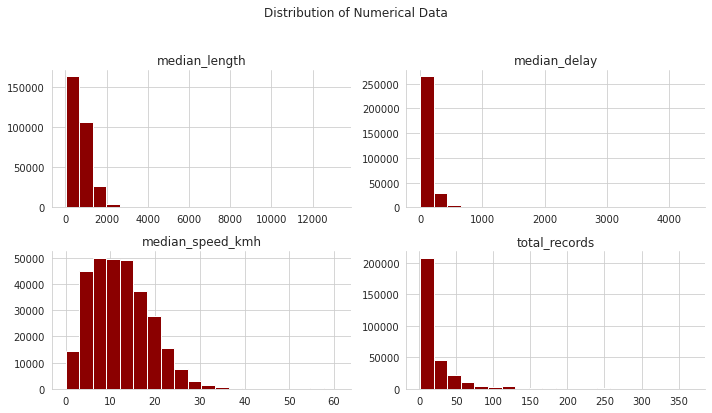

In [115]:
numerical_columns = [
    "median_length",
    "median_delay",
    "median_speed_kmh",
    "total_records"
]

# facet & geometric object
ax = df[numerical_columns].hist(figsize=(10, 6), bins=20, color='darkred')

# aesthetics
sns.set_style("ticks")
sns.despine()
plt.suptitle("Distribution of Numerical Data")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


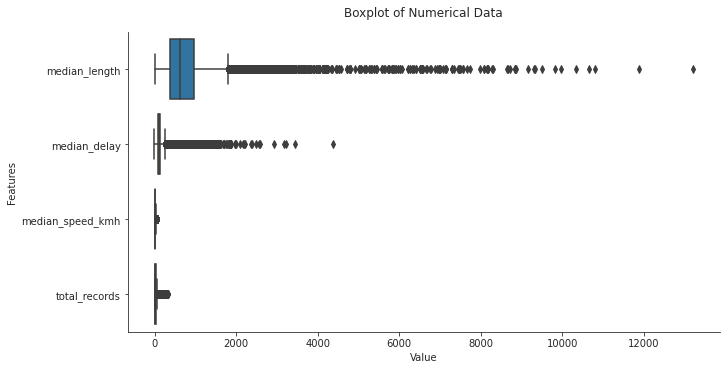

In [ ]:
# facet
plt.figure(figsize=(10, 5))

# geometric object
sns.boxplot(data=df[numerical_columns], orient="h")

# aesthetics
sns.set_style("whitegrid")
sns.despine()
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Boxplot of Numerical Data", pad=15)
plt.ylabel("Features")
plt.xlabel("Value")
plt.xticks(rotation=360)
plt.show()

In [ ]:
df['street'].nunique()

1161

In [ ]:
df_street = df.groupby('street', as_index=False)['level'].count()
df_street.head()

,street,level
0,Abadi 1,1
1,Abadi Raya,5
2,Abadi Regency,1
3,Abdul Halim,3
4,Abdul Rahman Saleh,1926


In [ ]:
df_strt = df_street.sort_values(by='level', ascending=False)
df_strt

,street,level
711,N11 Soekarno-Hatta,4238
400,Ir Haji Juanda,3779
150,Cibaduyut Raya,3614
516,Jenderal AH Nasution,3570
527,KH Wahid Hasyim,3464
...,...,...
552,Kasturi 1,1
933,Satrugna,1
932,Satria Raya 3,1
930,Satria Kulon 4,1


In [ ]:
df_strt.describe()

,level
count,1161.000000
mean,258.012059
std,617.464940
min,1.000000
25%,2.000000
50%,9.000000
75%,129.000000
max,4238.000000


In [ ]:
top5streets = df['street'].value_counts().nlargest(5).index
top5streets

Index(['N11 Soekarno-Hatta', 'Ir Haji Juanda', 'Cibaduyut Raya',
       'Jenderal AH Nasution', 'Jenderal Ahmad Yani'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

top5streets = df['street'].value_counts().nlargest(5).index

df_top5 = df[df['street'].isin(top5streets)]

df_top5['top5streets'] = df_top5['street'].apply(lambda x: x in top5streets)

onehot_encoded = pd.get_dummies(df_top5['street'], prefix='street')

df1 = pd.concat([df_top5, onehot_encoded], axis=1)

<ipython-input-58-8448b76ef87c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['top5streets'] = df_top5['street'].apply(lambda x: x in top5streets)


In [ ]:
df1.head(5)

,time,street,level,median_length,median_delay,median_speed_kmh,total_records,median_level,day,hours,top5streets,street_Cibaduyut Raya,street_Ir Haji Juanda,street_Jenderal AH Nasution,street_Jenderal Ahmad Yani,street_N11 Soekarno-Hatta
0,2022-07-06,Jenderal Ahmad Yani,4,428.0,201.5,6.290,14,4.0,Wednesday,0,True,0,0,0,1,0
1,2022-07-06,Cibaduyut Raya,5,24.0,-1.0,0.000,60,5.0,Wednesday,0,True,1,0,0,0,0
5,2022-07-06,Ir Haji Juanda,2,1234.0,105.5,17.535,12,2.0,Wednesday,0,True,0,1,0,0,0
6,2022-07-06,Ir Haji Juanda,3,786.0,118.5,14.365,8,3.0,Wednesday,0,True,0,1,0,0,0
7,2022-07-06,Jenderal Ahmad Yani,3,863.0,215.0,9.880,1,3.0,Wednesday,0,True,0,0,0,1,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18665 entries, 0 to 301994
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   time                         18665 non-null  datetime64[ns]
 1   street                       18665 non-null  object        
 2   level                        18665 non-null  object        
 3   median_length                18665 non-null  float64       
 4   median_delay                 18665 non-null  float64       
 5   median_speed_kmh             18665 non-null  float64       
 6   total_records                18665 non-null  int64         
 7   median_level                 18665 non-null  float64       
 8   day                          18665 non-null  object        
 9   hours                        18665 non-null  object        
 10  top5streets                  18665 non-null  bool          
 11  street_Cibaduyut Raya        18665 non-n

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
df1['day_of_week'] = df1['time'].dt.dayofweek

df1['day_type'] = df1['day_of_week'].apply(lambda x: 'Weekdays' if x < 5 else 'Weekend')
df1 = pd.get_dummies(df1, columns=['day_type'])


In [ ]:
df1

,time,street,level,median_length,median_delay,median_speed_kmh,total_records,median_level,day,hours,top5streets,street_Cibaduyut Raya,street_Ir Haji Juanda,street_Jenderal AH Nasution,street_Jenderal Ahmad Yani,street_N11 Soekarno-Hatta,day_of_week,day_type_Weekdays,day_type_Weekend
0,2022-07-06 00:00:00,Jenderal Ahmad Yani,4,428.0,201.5,6.290,14,4.0,Wednesday,0,True,0,0,0,1,0,2,1,0
1,2022-07-06 00:00:00,Cibaduyut Raya,5,24.0,-1.0,0.000,60,5.0,Wednesday,0,True,1,0,0,0,0,2,1,0
5,2022-07-06 00:00:00,Ir Haji Juanda,2,1234.0,105.5,17.535,12,2.0,Wednesday,0,True,0,1,0,0,0,2,1,0
6,2022-07-06 00:00:00,Ir Haji Juanda,3,786.0,118.5,14.365,8,3.0,Wednesday,0,True,0,1,0,0,0,2,1,0
7,2022-07-06 00:00:00,Jenderal Ahmad Yani,3,863.0,215.0,9.880,1,3.0,Wednesday,0,True,0,0,0,1,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301966,2022-09-04 23:00:00,Cibaduyut Raya,5,24.0,-1.0,0.000,60,5.0,Sunday,23,True,1,0,0,0,0,6,0,1
301971,2022-09-04 23:00:00,Ir Haji Juanda,2,594.0,61.0,16.800,4,2.0,Sunday,23,True,0,1,0,0,0,6,0,1
301976,2022-09-04 23:00:00,N11 Soekarno-Hatta,2,1481.0,111.0,24.800,1,2.0,Sunday,23,True,0,0,0,0,1,6,0,1
301978,2022-09-04 23:00:00,N11 Soekarno-Hatta,1,2108.0,121.0,28.360,1,1.0,Sunday,23,True,0,0,0,0,1,6,0,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18665 entries, 0 to 301994
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   time                         18665 non-null  datetime64[ns]
 1   street                       18665 non-null  object        
 2   level                        18665 non-null  object        
 3   median_length                18665 non-null  float64       
 4   median_delay                 18665 non-null  float64       
 5   median_speed_kmh             18665 non-null  float64       
 6   total_records                18665 non-null  int64         
 7   median_level                 18665 non-null  float64       
 8   day                          18665 non-null  object        
 9   hours                        18665 non-null  object        
 10  top5streets                  18665 non-null  bool          
 11  street_Cibaduyut Raya        18665 non-n

In [ ]:
df1['hour_of_day'] = df1['time'].dt.hour

conditions = [
(df1['hour_of_day'] >= 0) & (df1['hour_of_day'] < 5),
(df1['hour_of_day'] >= 5) & (df1['hour_of_day'] < 11),
(df1['hour_of_day'] >= 11) & (df1['hour_of_day'] < 17),
(df1['hour_of_day'] >= 17) & (df1['hour_of_day'] <= 24)
]
values = ['Midnight', 'Morning', 'Afternoon', 'Night']

df1['hour_part'] = pd.Categorical(pd.cut(df1['hour_of_day'], bins=[0, 5, 11, 17, 24], labels=values, include_lowest=True))

df1 = pd.get_dummies(df1, columns=['hour_part'])

In [ ]:
df1

,time,street,level,median_length,median_delay,median_speed_kmh,total_records,median_level,day,hours,...,street_Jenderal Ahmad Yani,street_N11 Soekarno-Hatta,day_of_week,day_type_Weekdays,day_type_Weekend,hour_of_day,hour_part_Midnight,hour_part_Morning,hour_part_Afternoon,hour_part_Night
0,2022-07-06 00:00:00,Jenderal Ahmad Yani,4,428.0,201.5,6.290,14,4.0,Wednesday,0,...,1,0,2,1,0,0,1,0,0,0
1,2022-07-06 00:00:00,Cibaduyut Raya,5,24.0,-1.0,0.000,60,5.0,Wednesday,0,...,0,0,2,1,0,0,1,0,0,0
5,2022-07-06 00:00:00,Ir Haji Juanda,2,1234.0,105.5,17.535,12,2.0,Wednesday,0,...,0,0,2,1,0,0,1,0,0,0
6,2022-07-06 00:00:00,Ir Haji Juanda,3,786.0,118.5,14.365,8,3.0,Wednesday,0,...,0,0,2,1,0,0,1,0,0,0
7,2022-07-06 00:00:00,Jenderal Ahmad Yani,3,863.0,215.0,9.880,1,3.0,Wednesday,0,...,1,0,2,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301966,2022-09-04 23:00:00,Cibaduyut Raya,5,24.0,-1.0,0.000,60,5.0,Sunday,23,...,0,0,6,0,1,23,0,0,0,1
301971,2022-09-04 23:00:00,Ir Haji Juanda,2,594.0,61.0,16.800,4,2.0,Sunday,23,...,0,0,6,0,1,23,0,0,0,1
301976,2022-09-04 23:00:00,N11 Soekarno-Hatta,2,1481.0,111.0,24.800,1,2.0,Sunday,23,...,0,1,6,0,1,23,0,0,0,1
301978,2022-09-04 23:00:00,N11 Soekarno-Hatta,1,2108.0,121.0,28.360,1,1.0,Sunday,23,...,0,1,6,0,1,23,0,0,0,1


In [ ]:
df1.to_csv("Data_Final.csv", index=False)

In [ ]:
df1.head()

,time,street,level,median_length,median_delay,median_speed_kmh,total_records,median_level,day,hours,...,street_Jenderal Ahmad Yani,street_N11 Soekarno-Hatta,day_of_week,day_type_Weekdays,day_type_Weekend,hour_of_day,hour_part_Midnight,hour_part_Morning,hour_part_Afternoon,hour_part_Night
0,2022-07-06,Jenderal Ahmad Yani,4,428.0,201.5,6.290,14,4.0,Wednesday,0,...,1,0,2,1,0,0,1,0,0,0
1,2022-07-06,Cibaduyut Raya,5,24.0,-1.0,0.000,60,5.0,Wednesday,0,...,0,0,2,1,0,0,1,0,0,0
5,2022-07-06,Ir Haji Juanda,2,1234.0,105.5,17.535,12,2.0,Wednesday,0,...,0,0,2,1,0,0,1,0,0,0
6,2022-07-06,Ir Haji Juanda,3,786.0,118.5,14.365,8,3.0,Wednesday,0,...,0,0,2,1,0,0,1,0,0,0
7,2022-07-06,Jenderal Ahmad Yani,3,863.0,215.0,9.880,1,3.0,Wednesday,0,...,1,0,2,1,0,0,1,0,0,0


In [ ]:
df1.nunique()

time                           1419
street                            5
level                             5
median_length                  2678
median_delay                   1162
median_speed_kmh               5676
total_records                   279
median_level                      5
day                               7
hours                            24
top5streets                       1
street_Cibaduyut Raya             2
street_Ir Haji Juanda             2
street_Jenderal AH Nasution       2
street_Jenderal Ahmad Yani        2
street_N11 Soekarno-Hatta         2
day_of_week                       7
day_type_Weekdays                 2
day_type_Weekend                  2
hour_of_day                      24
hour_part_Midnight                2
hour_part_Morning                 2
hour_part_Afternoon               2
hour_part_Night                   2
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18665 entries, 0 to 301994
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   time                         18665 non-null  datetime64[ns]
 1   street                       18665 non-null  object        
 2   level                        18665 non-null  int64         
 3   median_length                18665 non-null  float64       
 4   median_delay                 18665 non-null  float64       
 5   median_speed_kmh             18665 non-null  float64       
 6   total_records                18665 non-null  int64         
 7   median_level                 18665 non-null  float64       
 8   day                          18665 non-null  object        
 9   hours                        18665 non-null  int64         
 10  top5streets                  18665 non-null  bool          
 11  street_Cibaduyut Raya        18665 non-n

# Exploratory Data Analysis

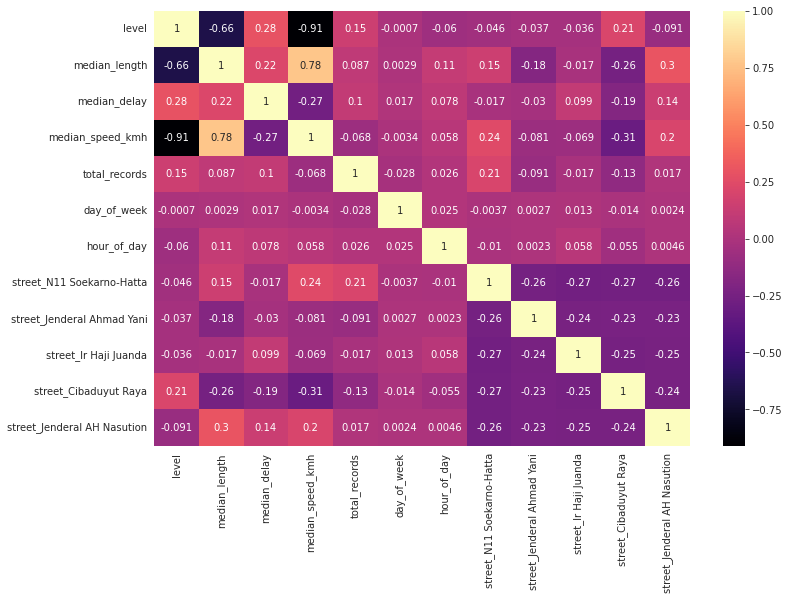

<Figure size 432x288 with 0 Axes>

In [ ]:
numerical_cols = ['level','median_length', 'median_delay', 'median_speed_kmh', 'total_records', 'day_of_week', 'hour_of_day', 'street_N11 Soekarno-Hatta','street_Jenderal Ahmad Yani','street_Ir Haji Juanda','street_Cibaduyut Raya','street_Jenderal AH Nasution']
df1_numeric = df1[numerical_cols]

corr = df1_numeric.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="magma")
plt.show()
plt.savefig("Corr.png", bbox_inches='tight')

#Modelling

In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18665 entries, 0 to 301994
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   time                         18665 non-null  datetime64[ns]
 1   street                       18665 non-null  object        
 2   level                        18665 non-null  int64         
 3   median_length                18665 non-null  float64       
 4   median_delay                 18665 non-null  float64       
 5   median_speed_kmh             18665 non-null  float64       
 6   total_records                18665 non-null  int64         
 7   median_level                 18665 non-null  float64       
 8   day                          18665 non-null  object        
 9   hours                        18665 non-null  int64         
 10  top5streets                  18665 non-null  bool          
 11  street_Cibaduyut Raya        18665 non-n

In [ ]:
# split dataset into features (X) and target variable (y)
X = df1.drop(['median_speed_kmh','time', 'street','median_level', 'day','hours','top5streets', 'day_of_week','hour_of_day'], axis=1)
y = df1['median_speed_kmh']

# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18665 entries, 0 to 301994
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   level                        18665 non-null  int64  
 1   median_length                18665 non-null  float64
 2   median_delay                 18665 non-null  float64
 3   total_records                18665 non-null  int64  
 4   street_Cibaduyut Raya        18665 non-null  uint8  
 5   street_Ir Haji Juanda        18665 non-null  uint8  
 6   street_Jenderal AH Nasution  18665 non-null  uint8  
 7   street_Jenderal Ahmad Yani   18665 non-null  uint8  
 8   street_N11 Soekarno-Hatta    18665 non-null  uint8  
 9   day_type_Weekdays            18665 non-null  uint8  
 10  day_type_Weekend             18665 non-null  uint8  
 11  hour_part_Midnight           18665 non-null  uint8  
 12  hour_part_Morning            18665 non-null  uint8  
 13  hour_part_After

In [ ]:
# Linear Regression
linreg = LinearRegression()
params_linreg = {'fit_intercept': [True, False]}
grid_linreg = GridSearchCV(linreg, params_linreg, cv=5, scoring='neg_mean_squared_error')
grid_linreg.fit(X_train, y_train)
y_pred_linreg = grid_linreg.predict(X_test)
mse_linreg = mean_squared_error(y_test, y_pred_linreg)

In [ ]:
# Polynomial Regression
polyreg = PolynomialFeatures()
X_poly = polyreg.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)
linreg_poly = LinearRegression()
params_poly = {'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]}
grid_poly = GridSearchCV(linreg_poly, params_poly, cv=5, scoring='neg_mean_squared_error')
grid_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = grid_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

In [ ]:
# Decision Tree Regression
dtreg = DecisionTreeRegressor()
params_dtreg = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_dtreg = GridSearchCV(dtreg, params_dtreg, cv=5, scoring='neg_mean_squared_error')
grid_dtreg.fit(X_train, y_train)
y_pred_dtreg = grid_dtreg.predict(X_test)
mse_dtreg = mean_squared_error(y_test, y_pred_dtreg)

In [ ]:
# Random Forest Regression
rfreg = RandomForestRegressor()
params_rfreg = {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_rfreg = GridSearchCV(rfreg, params_rfreg, cv=5, scoring='neg_mean_squared_error')
grid_rfreg.fit(X_train, y_train)
y_pred_rfreg = grid_rfreg.predict(X_test)
mse_rfreg = mean_squared_error(y_test, y_pred_rfreg)


In [94]:
# Gradient Boosting Regression
gbreg = GradientBoostingRegressor()
params_gbreg = {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10], 'learning_rate': [0.1, 0.5, 1]}
grid_gbreg = GridSearchCV(gbreg, params_gbreg, cv=5, scoring='neg_mean_squared_error')
grid_gbreg.fit(X_train, y_train)
y_pred_gbreg = grid_gbreg.predict(X_test)
mse_gbreg = mean_squared_error(y_test, y_pred_gbreg)

In [107]:
!pip install xgboost
import xgboost as xgb

xgbreg = xgb.XGBRegressor()
params_xgbreg = {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 10], 'learning_rate': [0.1, 0.5, 1]}
grid_xgbreg = GridSearchCV(xgbreg, params_xgbreg, cv=5, scoring='neg_mean_squared_error')
grid_xgbreg.fit(X_train, y_train)
y_pred_xgbreg = grid_xgbreg.predict(X_test)
mse_xgbreg = mean_squared_error(y_test, y_pred_xgbreg)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
from sklearn.metrics import r2_score

# Linear Regression
accuracy_linreg = r2_score(y_test, y_pred_linreg)

print("Linear Regression")
print("Best parameters: ", grid_linreg.best_params_)
print("MSE: ", mse_linreg)
print("Accuracy: ", accuracy_linreg)
print("\n")

# Polynomial Regression
accuracy_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression")
print("Best parameters: ", grid_poly.best_params_)
print("MSE: ", mse_poly)
print("Accuracy: ", accuracy_poly)
print("\n")

# Decision Tree Regression
accuracy_dtreg = r2_score(y_test, y_pred_dtreg)

print("Decision Tree Regression")
print("Best parameters: ", grid_dtreg.best_params_)
print("MSE: ", mse_dtreg)
print("Accuracy: ", accuracy_dtreg)
print("\n")

# Random Forest Regression
accuracy_rfreg = r2_score(y_test, y_pred_rfreg)

print("Random Forest Regression")
print("Best parameters: ", grid_rfreg.best_params_)
print("MSE: ", mse_rfreg)
print("Accuracy: ", accuracy_rfreg)
print("\n")

# Gradient Boosting Regression
accuracy_gbreg = r2_score(y_test, y_pred_gbreg)

print("Gradient Boosting Regression")
print("Best parameters: ", grid_gbreg.best_params_)
print("MSE: ", mse_gbreg)
print("Accuracy: ", accuracy_gbreg)
print("\n")

# XGBoosting Regression
accuracy_xgbreg = r2_score(y_test, y_pred_xgbreg)

print("XGBoosting Regression")
print("Best parameters: ", grid_xgbreg.best_params_)
print("MSE: ", mse_xgbreg)
print("Accuracy: ", accuracy_xgbreg)
print("\n")


Linear Regression
Best parameters:  {'fit_intercept': False}
MSE:  4.035151478485343
Accuracy:  0.9454123520480944


Polynomial Regression
Best parameters:  {'copy_X': True, 'fit_intercept': True, 'normalize': False}
MSE:  1.6538520560943153
Accuracy:  0.9776266407137459


Decision Tree Regression
Best parameters:  {'max_depth': 10, 'min_samples_split': 10}
MSE:  1.8250860612027895
Accuracy:  0.9753101820533725


Random Forest Regression
Best parameters:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
MSE:  1.3282867055279732
Accuracy:  0.9820308983573092


Gradient Boosting Regression
Best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
MSE:  1.1760733432672976
Accuracy:  0.9840900452014768


XGBoosting Regression
Best parameters:  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
MSE:  1.1875944908535632
Accuracy:  0.9839341867778726




In [98]:
from sklearn.metrics import r2_score, mean_squared_error

# Gradient Boosting Regression
mse_gbreg = mean_squared_error(y_test, y_pred_gbreg)
rmse_gbreg = np.sqrt(mse_gbreg)
accuracy_gbreg = r2_score(y_test, y_pred_gbreg)

print("Gradient Boosting Regression")
print("Best parameters: ", grid_gbreg.best_params_)
print("MSE: ", mse_gbreg)
print("RMSE: ", rmse_gbreg)
print("Accuracy: ", accuracy_gbreg)
print("\n")

Gradient Boosting Regression
Best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
MSE:  1.1760733432672976
RMSE:  1.0844691527504586
Accuracy:  0.9840900452014768




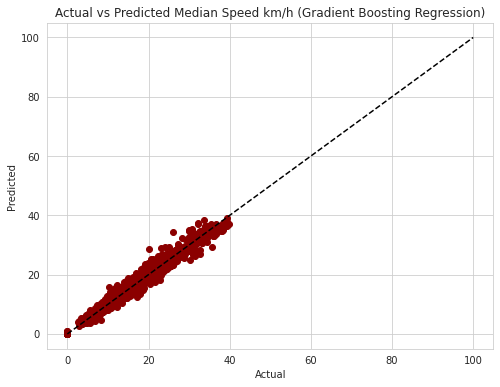

In [110]:
import matplotlib.pyplot as plt

# predict using the trained model
y_pred_gbreg = grid_gbreg.predict(X_test)

# plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gbreg, color='darkred')
plt.plot([0, 100], [0, 100], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Median Speed km/h (Gradient Boosting Regression)')
plt.show()

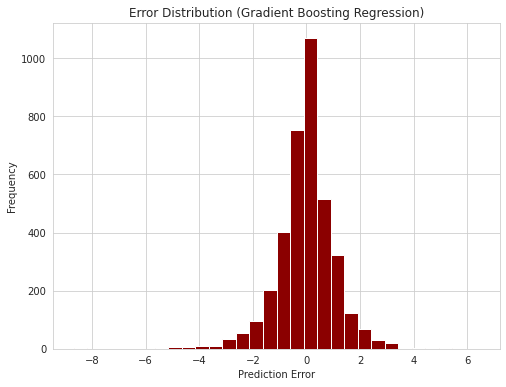

In [111]:
# plot error distribution
error = (y_test - y_pred_gbreg)
plt.figure(figsize=(8, 6))
plt.hist(error, bins=30, color='darkred')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Error Distribution (Gradient Boosting Regression)')
plt.show()

In [102]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor

# Define the model with the best parameters
model = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100)

# Define the number of splits for the cross-validation
kf = KFold(n_splits=5)

# Perform cross-validation on the model
scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = -1 * scores.mean()
std_score = scores.std()

# Print the results
print('Cross-Validation Scores:')
print(scores)
print('Mean Score:', mean_score)
print('Standard Deviation:', std_score)


Cross-Validation Scores:
[-1.06525229 -1.09002701 -1.14898944 -1.13926931 -1.31004635]
Mean Score: 1.1507168815520825
Standard Deviation: 0.085448659405569


In [112]:
df_result = pd.DataFrame({'predicted': y_pred_gbreg, 'actual': y_test})

In [113]:
df_result.to_csv('result.csv', index=False)